# Note book for EE project EDA

## Import and load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
import ee_functions as ee

In [4]:
dataset_list = [ee.make_data_sample(floor=i) for i in range(1, 8)]

count_total_zone = 0
count_total_col = 0
for i, e in enumerate(dataset_list):
    zone = ee.sep_zone(e)
    print(f"a number of zone floor {i+1}:", len(zone))
    count_total_zone += len(zone)
    count_col = 0
    for key, value in zone.items():
        print(f'zone {key}: {len(value)} columns')
        count_col += len(value)
    count_total_col += count_col
    print("total: ", len(zone), 'zones per floor')
    print("total: ", count_col, "columns per floor\n")

print("total zones: ", count_total_zone)
print("total columns: ", count_total_col)

a number of zone floor 1: 4
zone z1: 3 columns
zone z2: 7 columns
zone z3: 3 columns
zone z4: 2 columns
total:  4 zones per floor
total:  15 columns per floor

a number of zone floor 2: 4
zone z1: 7 columns
zone z2: 20 columns
zone z3: 6 columns
zone z4: 7 columns
total:  4 zones per floor
total:  40 columns per floor

a number of zone floor 3: 5
zone z1: 10 columns
zone z2: 7 columns
zone z3: 3 columns
zone z4: 7 columns
zone z5: 7 columns
total:  5 zones per floor
total:  34 columns per floor

a number of zone floor 4: 5
zone z1: 10 columns
zone z2: 7 columns
zone z3: 3 columns
zone z4: 7 columns
zone z5: 7 columns
total:  5 zones per floor
total:  34 columns per floor

a number of zone floor 5: 5
zone z1: 10 columns
zone z2: 7 columns
zone z3: 3 columns
zone z4: 7 columns
zone z5: 7 columns
total:  5 zones per floor
total:  34 columns per floor

a number of zone floor 6: 5
zone z1: 7 columns
zone z2: 7 columns
zone z3: 3 columns
zone z4: 10 columns
zone z5: 7 columns
total:  5 zones

## EDA Missing Value

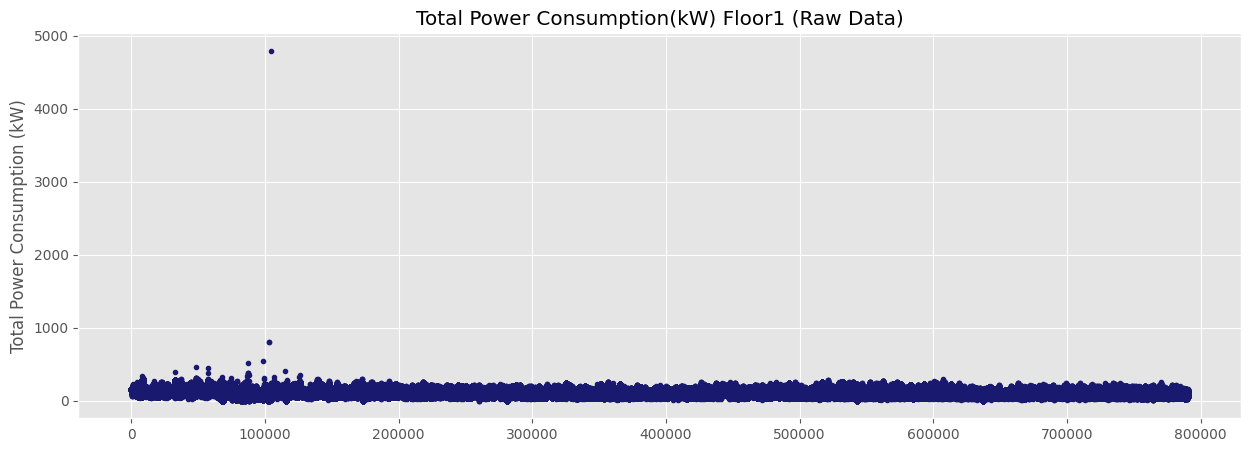

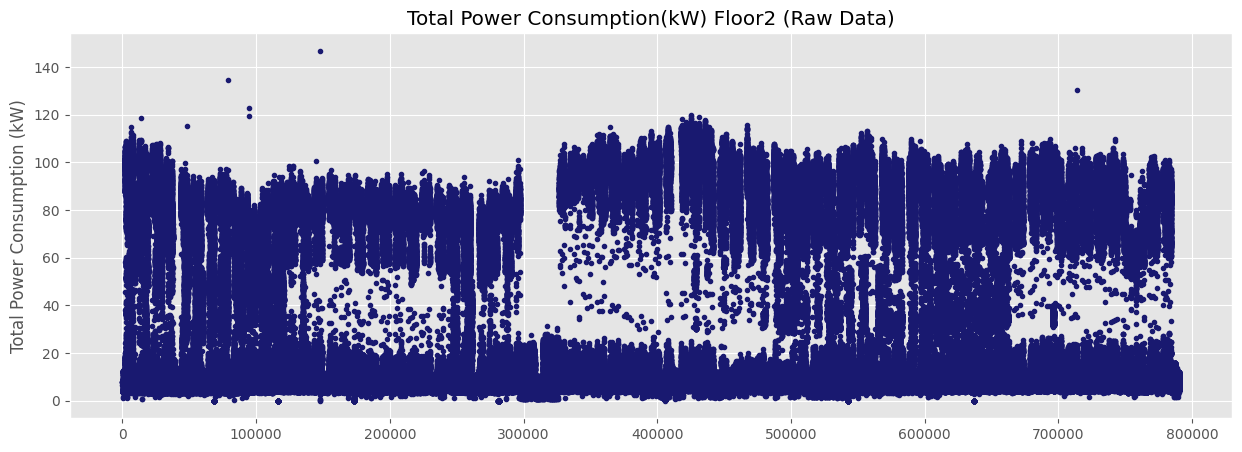

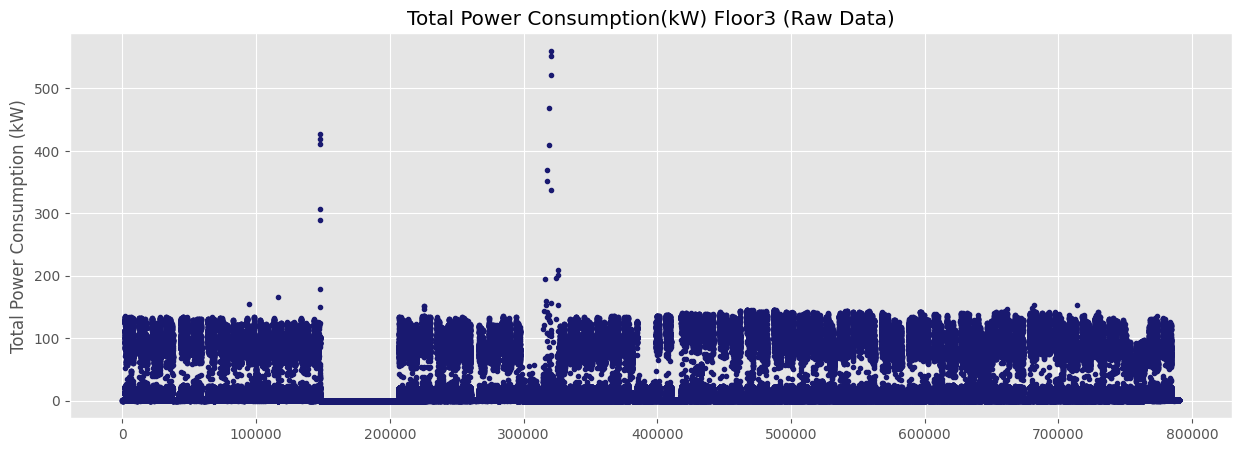

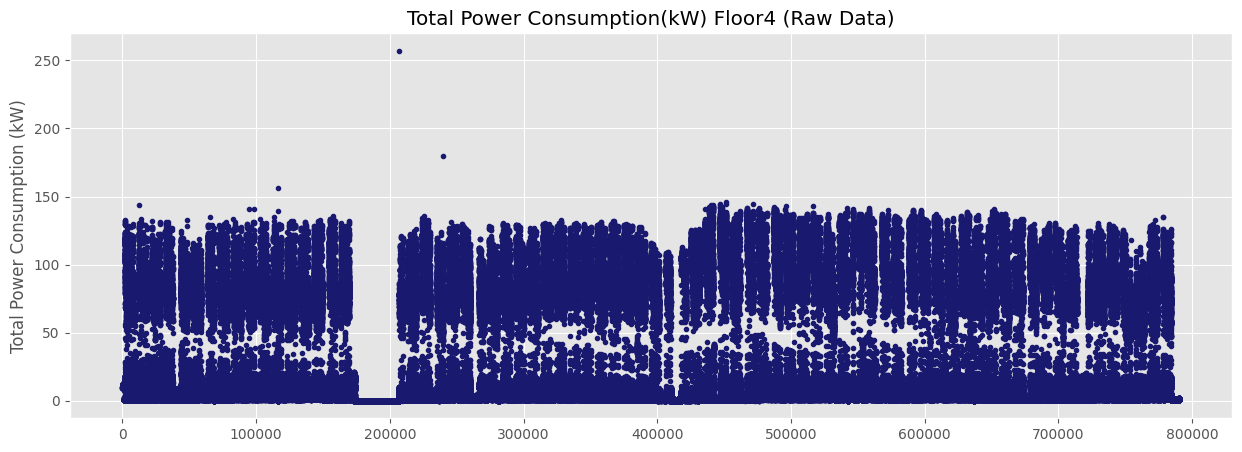

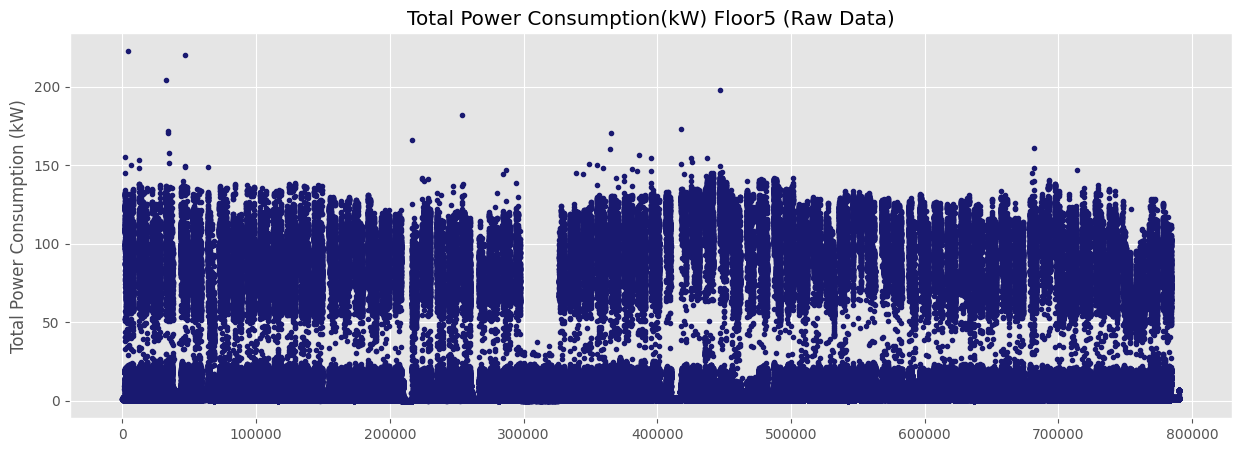

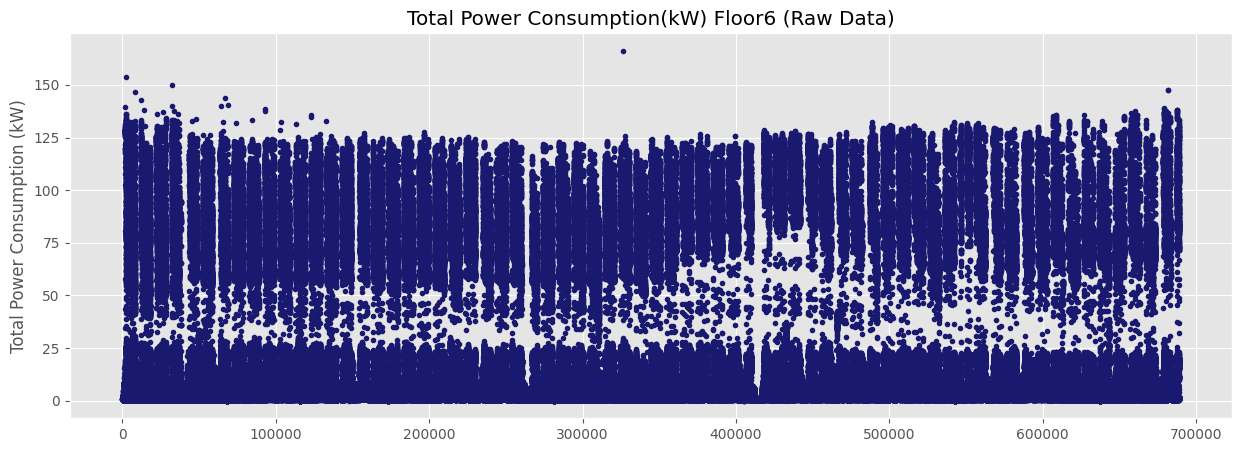

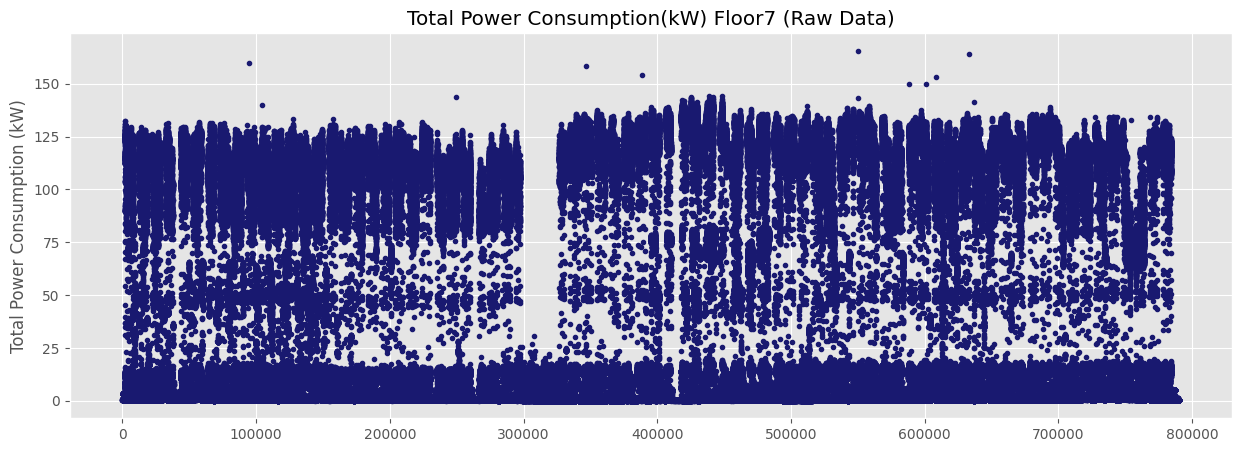

<Figure size 640x480 with 0 Axes>

In [4]:
for i, e in enumerate(dataset_list):
    dataset_list[i] = ee.process_data(e)
    dataset_list[i]['sum_power_consumption(kW)'].plot(figsize=(15, 5), style='.', color='midnightblue')
    plt.title(f'Total Power Consumption(kW) Floor{i+1} (Raw Data)')
    plt.ylabel('Total Power Consumption (kW)')
    plt.show()
    plt.savefig(f'total_energy_consump_raw_floor{i+1}')

## EDA dataset

In [12]:
df = dataset_list[3]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790560 entries, 0 to 790559
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          790560 non-null  datetime64[ns]
 1   z1_AC1(kW)    621829 non-null  float64       
 2   z1_AC2(kW)    621829 non-null  float64       
 3   z1_AC3(kW)    621829 non-null  float64       
 4   z1_AC4(kW)    751579 non-null  float64       
 5   z1_Light(kW)  707605 non-null  float64       
 6   z1_Plug(kW)   756532 non-null  float64       
 7   z1_S1(degC)   526125 non-null  float64       
 8   z1_S1(RH%)    526128 non-null  float64       
 9   z1_S1(lux)    526127 non-null  float64       
 10  z2_AC1(kW)    751576 non-null  float64       
 11  z2_Light(kW)  707605 non-null  float64       
 12  z2_Plug(kW)   707605 non-null  float64       
 13  z2_S1(degC)   519026 non-null  float64       
 14  z2_S1(RH%)    519026 non-null  float64       
 15  z2_S1(lux)    519

In [10]:
df.columns

Index(['Date', 'z1_AC1(kW)', 'z1_AC2(kW)', 'z1_AC3(kW)', 'z1_AC4(kW)',
       'z1_Light(kW)', 'z1_Plug(kW)', 'z1_S1(degC)', 'z1_S1(RH%)',
       'z1_S1(lux)', 'z2_AC1(kW)', 'z2_Light(kW)', 'z2_Plug(kW)',
       'z2_S1(degC)', 'z2_S1(RH%)', 'z2_S1(lux)', 'z3_Light(kW)',
       'z3_Plug(kW)', 'z4_AC1(kW)', 'z4_Light(kW)', 'z4_Plug(kW)',
       'z4_S1(degC)', 'z4_S1(RH%)', 'z4_S1(lux)', 'z5_AC1(kW)', 'z5_Light(kW)',
       'z5_Plug(kW)', 'z5_S1(degC)', 'z5_S1(RH%)', 'z5_S1(lux)'],
      dtype='object')

In [18]:
df = ee.process_data(df)

Text(0.5, 1.0, 'sum_power_consumption(kW)')

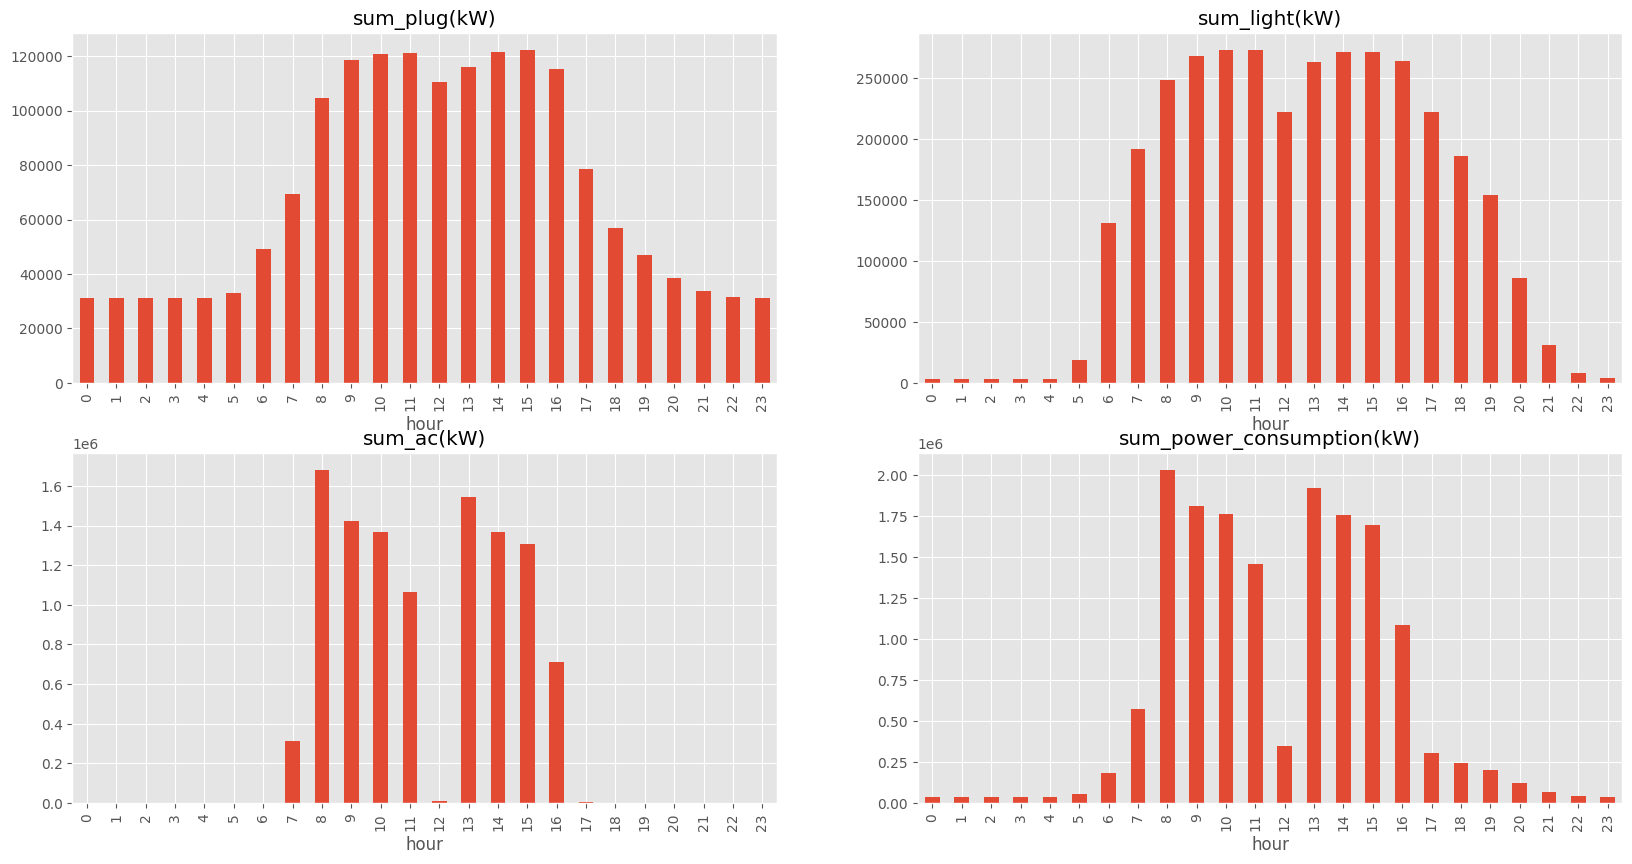

In [20]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
df.groupby('hour')['sum_plug(kW)'].sum().plot(kind='bar')
plt.title('sum_plug(kW)')

plt.subplot(2, 2, 2)
df.groupby('hour')['sum_light(kW)'].sum().plot(kind='bar')
plt.title('sum_light(kW)')

plt.subplot(2, 2, 3)
df.groupby('hour')['sum_ac(kW)'].sum().plot(kind='bar')
plt.title('sum_ac(kW)')

plt.subplot(2, 2, 4)
df.groupby('hour')['sum_power_consumption(kW)'].sum().plot(kind='bar')
plt.title('sum_power_consumption(kW)')

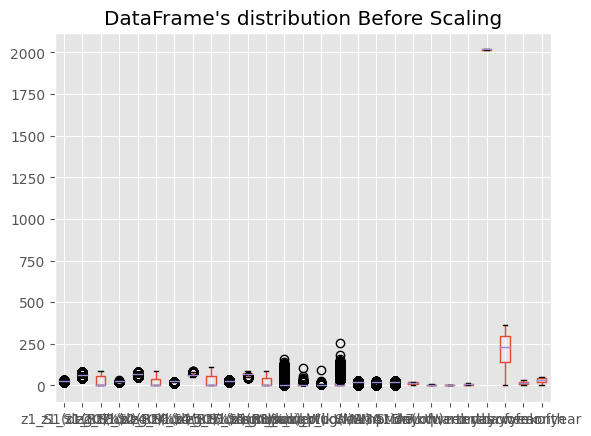

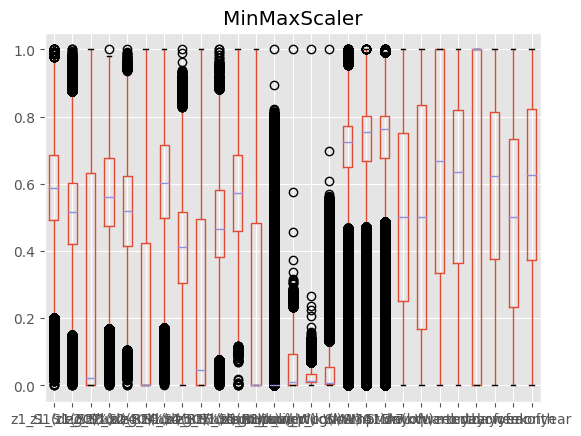

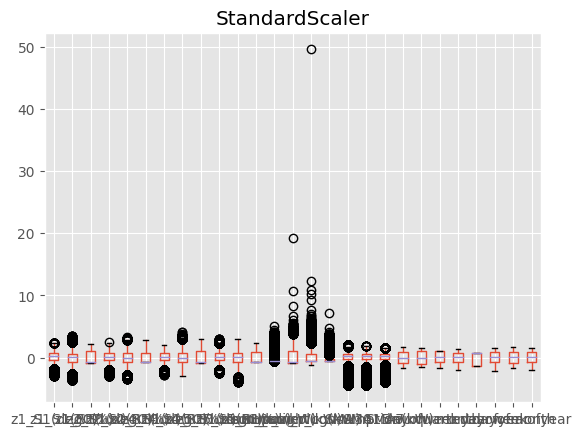

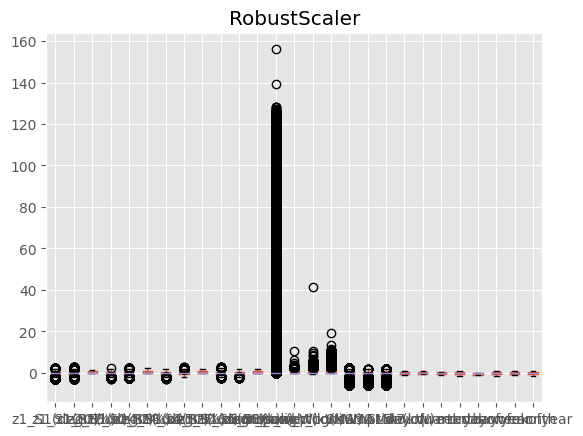

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

df.boxplot()
plt.title("DataFrame's distribution Before Scaling")
plt.show()
for Title, scaler in {'MinMaxScaler': MinMaxScaler(), 
                'StandardScaler': StandardScaler(), 
                'RobustScaler': RobustScaler()}.items():
    df_temp = df.copy()
    array_scaled = scaler.fit_transform(df_temp.drop(columns=['Date']))
    df_temp = ee.form_dataframe(array_scaled, df_temp)
    df_temp.boxplot()
    plt.title(Title)
    plt.show()

In [24]:
pd.read_parquet('./Project Progress/score_compare/compare_score2(impute).parquet')

,R-squared,MSE,MAE
Baseline score,-0.000200,451.307100,13.444900
Using IterativeImputer for each zone without timeseries features,0.885000,58.292900,3.402300
Using IterativeImputer for each zone without timeseries features ON train set,0.900300,47.636000,2.500800
Using IterativeImputer for each zone without timeseries features CV,0.840280,69.502632,3.827843
Using Groupby and Mean Imputation with timeseries features,0.887700,61.433100,3.377200
Using Groupby and Mean Imputation with timeseries features ON train set,0.850500,81.747100,3.318200
Using Groupby and Mean Imputation with timeseries features CV,0.678478,158.615994,5.798127
Using IterativeImputer for each zone with timeseries features,0.849700,85.785000,4.056500
Using IterativeImputer for each zone with timeseries features ON train set,0.894100,52.075300,2.729400
Using IterativeImputer for each zone with timeseries features CV,0.826602,81.833750,4.307022


# Model development

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import time
import copy

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from verstack import NaNImputer
from verstack import NaNImputerLegacy

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


# from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import TimeSeriesSplit
# from sklearn.model_selection import cross_validate

from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

import joblib
import pickle

import warnings
warnings.filterwarnings('ignore')

# some necessary libraries imported in ee_functions.py file

import ee_functions as ee

In [2]:
df = ee.make_data_sample(floor=4)
init_zone = ee.sep_zone(df)
print(init_zone.keys())

# specify zone needed here
zone, cols_name = ee.choose_zone(init_zone, ['z1'])

df = df[cols_name]
df = ee.reduce_resolution(df, interval=15)

imputer_knn_transformer = FunctionTransformer(ee.imputer_knn, kw_args={'zone': zone})
df_sample = imputer_knn_transformer.fit_transform(df)

X, y = ee.sep_input_output(df_sample)
X_train, X_test, y_train, y_test = ee.train_test_split_data(X, y, train_size=0.8)
X_train_new, X_eval, y_train_new, y_eval = ee.train_test_split_data(ee.set_index_as_index(X_train), ee.set_index_as_index(y_train), train_size=0.8)

scaler = StandardScaler()
scaler_X = copy.deepcopy(scaler)
scaler_y = copy.deepcopy(scaler)
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.fit_transform(y_test)

scaler_X_eval = copy.deepcopy(scaler)
scaler_y_eval = copy.deepcopy(scaler)

X_train_new = scaler_X_eval.fit_transform(X_train_new)
X_eval = scaler_X_eval.transform(X_eval)
y_train_new = scaler_y_eval.fit_transform(y_train_new)
y_eval = scaler_y_eval.fit_transform(y_eval)

dict_keys(['z1', 'z2', 'z3', 'z4', 'z5'])


## Early Stopping Criterion

In [3]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

time_list = []
score_r2_list = []
score_mse_list = []

# default parameters
print('processing...model 1')
model_xgb1 = XGBRegressor()
time_start = time.time()
model_xgb1.fit(X_train, y_train)
time_list.append(time.time() - time_start)
score_r2_list.append(r2_score(y_test, model_xgb1.predict(X_test)))
score_mse_list.append(mean_squared_error(y_test, model_xgb1.predict(X_test), squared=False))

# without early stopping n_estimator: 100
print('processing...model 2')
model_xgb2 = XGBRegressor(n_estimators=200)
time_start = time.time()
model_xgb2.fit(X_train, y_train)
time_list.append(time.time() - time_start)
score_r2_list.append(r2_score(y_test, model_xgb2.predict(X_test)))
score_mse_list.append(mean_squared_error(y_test, model_xgb2.predict(X_test), squared=False))

# with early stopping n_estimators: 100
print('processing...model 3')
model_xgb3 = XGBRegressor(n_estimators=200, learning_rate=0.1, early_stopping_rounds=20)
time_start = time.time()
model_xgb3.fit(X_train_new, y_train_new, eval_set=[(X_eval, y_eval)], eval_metric='rmse')
time_list.append(time.time() - time_start)
score_r2_list.append(r2_score(y_test, model_xgb3.predict(X_test)))
score_mse_list.append(mean_squared_error(y_test, model_xgb3.predict(X_test), squared=False))

# use n_estimators from early stopping criterion
print('processing...model 4')
model_xgb4 = XGBRegressor(n_estimators=model_xgb3.best_iteration+1)
time_start = time.time()
model_xgb4.fit(X_train, y_train)
time_list.append(time.time() - time_start)
score_r2_list.append(r2_score(y_test, model_xgb4.predict(X_test)))
score_mse_list.append(mean_squared_error(y_test, model_xgb4.predict(X_test), squared=False))

print('training models finish')

processing...model 1
processing...model 2
processing...model 3
[0]	validation_0-rmse:1.01442
[1]	validation_0-rmse:0.92013
[2]	validation_0-rmse:0.83801
[3]	validation_0-rmse:0.76509
[4]	validation_0-rmse:0.70213
[5]	validation_0-rmse:0.64612
[6]	validation_0-rmse:0.59942
[7]	validation_0-rmse:0.55430
[8]	validation_0-rmse:0.51929
[9]	validation_0-rmse:0.48688
[10]	validation_0-rmse:0.46107
[11]	validation_0-rmse:0.43812
[12]	validation_0-rmse:0.42040
[13]	validation_0-rmse:0.40573
[14]	validation_0-rmse:0.39255
[15]	validation_0-rmse:0.38346
[16]	validation_0-rmse:0.37708
[17]	validation_0-rmse:0.36857
[18]	validation_0-rmse:0.36132
[19]	validation_0-rmse:0.35944
[20]	validation_0-rmse:0.36154
[21]	validation_0-rmse:0.36008
[22]	validation_0-rmse:0.35623
[23]	validation_0-rmse:0.35640
[24]	validation_0-rmse:0.35397
[25]	validation_0-rmse:0.35451
[26]	validation_0-rmse:0.35631
[27]	validation_0-rmse:0.35775
[28]	validation_0-rmse:0.35761
[29]	validation_0-rmse:0.35881
[30]	validation_0

In [10]:
print(model_xgb3.best_iteration)

24


In [4]:
def autolabel(rects, values_list, container):
    """
    Attach a text label above each bar displaying n_estimators of each model
    """
    for i, rect in enumerate(rects):
        plt.text(
            rect.get_x() + rect.get_width() / 2.0,
            1.05 * rect.get_height(),
            f"{container}={round(values_list[i], 0)}",
            ha="center",
            va="bottom",
        )

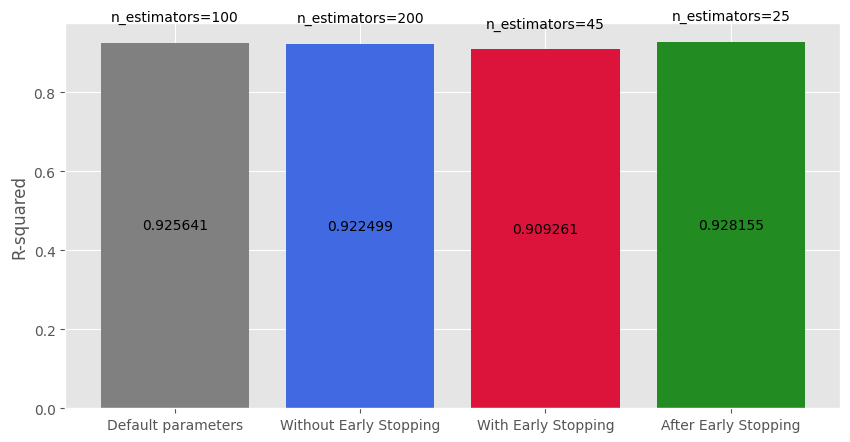

In [11]:
# r2
fig, ax = plt.subplots(figsize=(10, 5))
bar1 = ax.bar('Default parameters', score_r2_list[0], color='grey')
ax.bar_label(bar1, label_type='center')
bar2 = ax.bar('Without Early Stopping', score_r2_list[1], color='royalblue')
ax.bar_label(bar2, label_type='center')
bar3 = ax.bar('With Early Stopping', score_r2_list[2], color='crimson')
ax.bar_label(bar3, label_type='center')
bar4 = ax.bar('After Early Stopping', score_r2_list[3], color='forestgreen')
ax.bar_label(bar4, label_type='center')
plt.ylabel('R-squared')
autolabel(bar1, [model_xgb1.best_iteration+1], 'n_estimators')
autolabel(bar2, [model_xgb2.best_iteration+1], 'n_estimators')
autolabel(bar3, [len(model_xgb3.evals_result()['validation_0']['rmse'])], 'n_estimators')
autolabel(bar4, [model_xgb4.best_iteration+1], 'n_estimators')

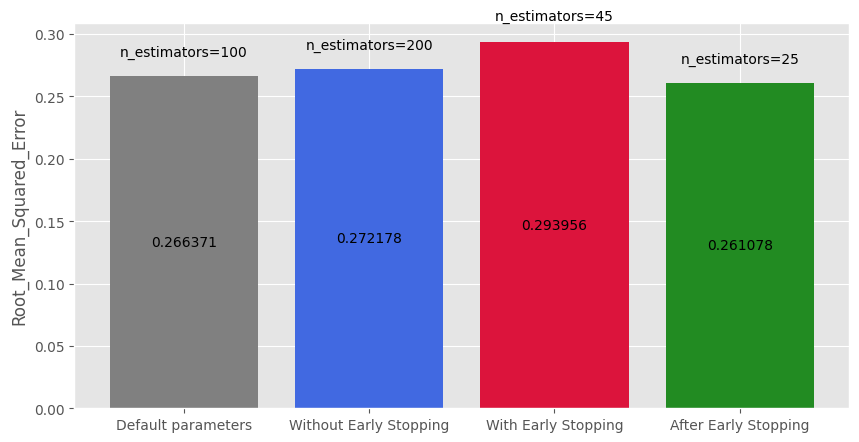

In [12]:
# rmse
fig, ax = plt.subplots(figsize=(10, 5))
bar1 = ax.bar('Default parameters', score_mse_list[0], color='grey')
ax.bar_label(bar1, label_type='center')
bar2 = ax.bar('Without Early Stopping', score_mse_list[1], color='royalblue')
ax.bar_label(bar2, label_type='center')
bar3 = ax.bar('With Early Stopping', score_mse_list[2], color='crimson')
ax.bar_label(bar3, label_type='center')
bar4 = ax.bar('After Early Stopping', score_mse_list[3], color='forestgreen')
ax.bar_label(bar4, label_type='center')
plt.ylabel('Root_Mean_Squared_Error')
autolabel(bar1, [model_xgb1.best_iteration+1], 'n_estimators')
autolabel(bar2, [model_xgb2.best_iteration+1], 'n_estimators')
autolabel(bar3, [len(model_xgb3.evals_result()['validation_0']['rmse'])], 'n_estimators')
autolabel(bar4, [model_xgb4.best_iteration+1], 'n_estimators')

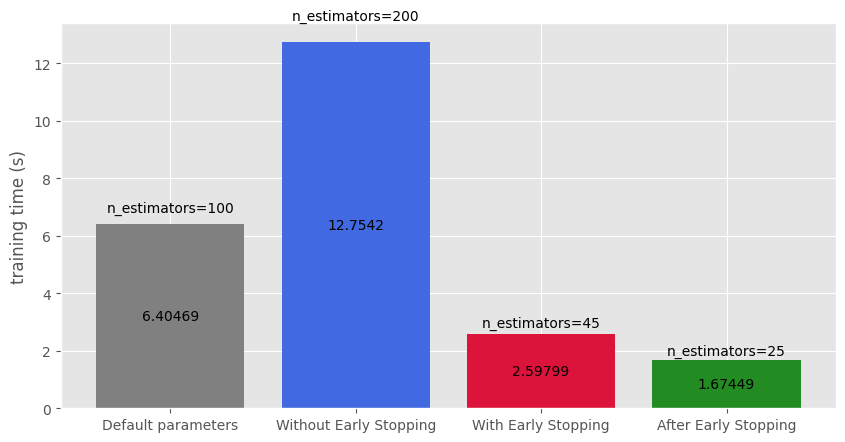

In [13]:
# time
fig, ax = plt.subplots(figsize=(10, 5))
bar1 = ax.bar('Default parameters', time_list[0], color='grey')
ax.bar_label(bar1, label_type='center')
bar2 = ax.bar('Without Early Stopping', time_list[1], color='royalblue')
ax.bar_label(bar2, label_type='center')
bar3 = ax.bar('With Early Stopping', time_list[2], color='crimson')
ax.bar_label(bar3, label_type='center')
bar4 = ax.bar('After Early Stopping', time_list[3], color='forestgreen')
ax.bar_label(bar4, label_type='center')
plt.ylabel('training time (s)')
autolabel(bar1, [model_xgb1.best_iteration+1], 'n_estimators')
autolabel(bar2, [model_xgb2.best_iteration+1], 'n_estimators')
autolabel(bar3, [len(model_xgb3.evals_result()['validation_0']['rmse'])], 'n_estimators')
autolabel(bar4, [model_xgb4.best_iteration+1], 'n_estimators')
# plt.bar_label(time_list)

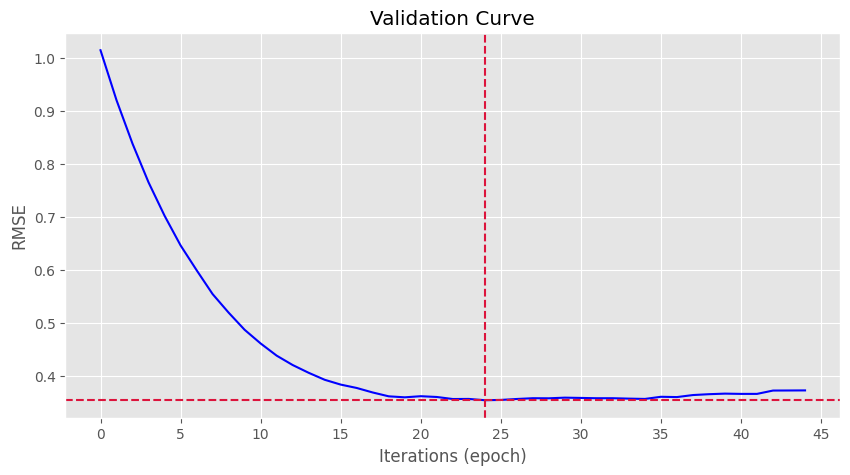

In [14]:
score = model_xgb3.evals_result()['validation_0']['rmse']
iterations = np.arange(start=0, stop=len(score), step=1)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(iterations, score, c='b')
plt.xticks(np.arange(min(iterations), max(iterations)+5, step=5))
plt.xlabel('Iterations (epoch)')
plt.ylabel('RMSE')
plt.title('Validation Curve')
plt.axhline(min(score), c='crimson', linestyle='--')
plt.axvline(score.index(min(score)), c='crimson', linestyle='--')